In [1]:
from scipy.sparse import diags
import random
import numpy as np
import scipy as sc
import pandas as pd
import csv
import scipy.linalg as spl
import matplotlib.pyplot as plt
from matplotlib import rc
rc('text', usetex=True)
import time
import sys
sys.path.insert(0, '../../python/')
from opt_utils import *
from grad_utils import *
from ks_utils import *
from simulation_utils import *
from cv_utils import *
%matplotlib inline

# Generate synethic data

In [2]:
N = 50 # number of teams
T = 50 # number of seasons/rounds/years
tn = [1] * int(T * N * (N - 1)/2) # number of games between each pair of teams

### Gaussian Process

In [3]:
[alpha,r] = [1,1]
##### get beta here #####
random.seed(0)
np.random.seed(0)
beta_gp = beta_gaussian_process(N, T, mu_parameters = [0,0.1], cov_parameters = [alpha,r], mu_type = 'constant', cov_type = 'toeplitz')
game_matrix_list = get_game_matrix_list(N,T,tn,beta_gp)

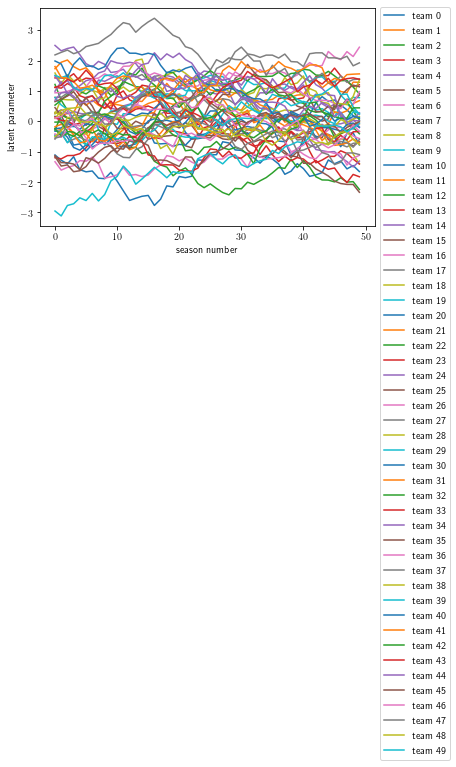

In [4]:
latent = beta_gp
for i in range(N):
    plt.plot(latent[:,i], label="team %d"%i)
plt.xlabel("season number")
plt.ylabel("latent parameter")
plt.legend(loc='upper left', bbox_to_anchor=(1, 1.03, 1, 0))

In [5]:
data = game_matrix_list # shape: T*N*N

In [6]:
# true beta
beta_true = beta_gp + 0

In [7]:
beta_true.shape

(50, 50)

## Kernel method

## $h = T^{-3/4}$

In [8]:
T = 50

In [9]:
T**(-3/4)

0.053182958969449884

In [10]:
1/12 * T**(-1/5)

0.03810875432727719

In [11]:
T, N = data.shape[0:2]
ks_data = kernel_smooth(data,T**(-3/4))

In [12]:
ks_data[1,:,:]

array([[0.00000000e+00, 2.09886531e-01, 2.02855701e-01, ...,
        6.74694086e-01, 1.35556418e-06, 9.83360697e-01],
       [7.90113469e-01, 0.00000000e+00, 3.75970603e-01, ...,
        5.58723715e-01, 7.15148601e-01, 1.00000000e+00],
       [7.97144299e-01, 6.24029397e-01, 0.00000000e+00, ...,
        8.93277720e-01, 5.27527379e-01, 1.00000000e+00],
       ...,
       [3.25305914e-01, 4.41276285e-01, 1.06722280e-01, ...,
        0.00000000e+00, 5.03073285e-01, 1.00000000e+00],
       [9.99998644e-01, 2.84851399e-01, 4.72472621e-01, ...,
        4.96926715e-01, 0.00000000e+00, 9.99992034e-01],
       [1.66393027e-02, 1.72164132e-12, 2.36760671e-11, ...,
        2.79910367e-10, 7.96643881e-06, 0.00000000e+00]])

In [13]:
objective_pgd, beta_pgd = gd_bt(data = ks_data,verbose=True)

initial objective value: 42455.264809
1-th GD, objective value: 34580.483960
2-th GD, objective value: 33366.122825
3-th GD, objective value: 33331.648138
4-th GD, objective value: 33325.602475
5-th GD, objective value: 33323.236828
6-th GD, objective value: 33323.027827
7-th GD, objective value: 33322.991626
8-th GD, objective value: 33322.965356
9-th GD, objective value: 33322.959754
10-th GD, objective value: 33322.955306
11-th GD, objective value: 33322.954287
12-th GD, objective value: 33322.953453
13-th GD, objective value: 33322.953254
14-th GD, objective value: 33322.953090
15-th GD, objective value: 33322.953050
16-th GD, objective value: 33322.953017
17-th GD, objective value: 33322.953008
18-th GD, objective value: 33322.953001
19-th GD, objective value: 33322.953000
20-th GD, objective value: 33322.952998
21-th GD, objective value: 33322.952998
22-th GD, objective value: 33322.952997
23-th GD, objective value: 33322.952997
24-th GD, objective value: 33322.952997
25-th GD, o

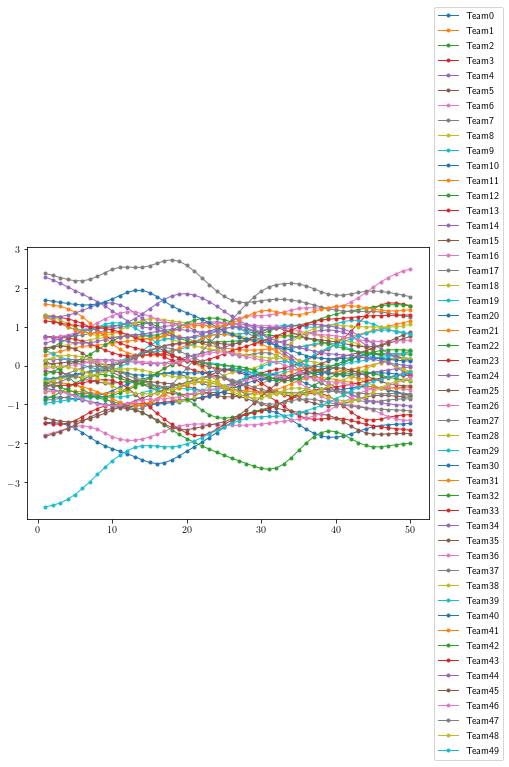

In [14]:
T, N = data.shape[0:2]
beta = beta_pgd.reshape((T,N))
f = plt.figure(1, figsize = (9,5))
ax = plt.subplot(111)
for i in range(N):
    ax.plot(range(1,T + 1),beta[:,i],marker = '.',label = 'Team' + str(i),linewidth=1)

box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])

# Put a legend to the right of the current axis
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.show()
# f.savefig("l2_sq_solution.pdf", bbox_inches='tight')

## LOOCV

In [15]:
import time
start_time = time.time()

random.seed(0)
np.random.seed(0)
h_list = np.linspace(0.2, 0.01, 10)
# h_cv, nll_cv, beta_cv, prob_cv = cv_utils.loocv_ks(data, h_list, gd_bt, num_loocv = 200, return_prob = True, out = "notebook")
h_cv, nll_cv, beta_cv, prob_cv = loocv_ks(data, h_list, gd_bt, num_loocv = 200, return_prob = True, out = "notebook")
loo_nll_DBT, loo_prob_DBT = max(nll_cv), prob_cv[np.argmax(nll_cv)]

print("--- %s seconds ---" % (time.time() - start_time))

1-th cv done
2-th cv done
3-th cv done
4-th cv done
5-th cv done
6-th cv done
7-th cv done
8-th cv done
9-th cv done
10-th cv done
11-th cv done
12-th cv done
13-th cv done
14-th cv done
15-th cv done
16-th cv done
17-th cv done
18-th cv done
19-th cv done
20-th cv done
21-th cv done
22-th cv done
23-th cv done
24-th cv done
25-th cv done
26-th cv done
27-th cv done
28-th cv done
29-th cv done
30-th cv done
31-th cv done
32-th cv done
33-th cv done
34-th cv done
35-th cv done
36-th cv done
37-th cv done
38-th cv done
39-th cv done
40-th cv done
41-th cv done
42-th cv done
43-th cv done
44-th cv done
45-th cv done
46-th cv done
47-th cv done
48-th cv done
49-th cv done
50-th cv done
51-th cv done
52-th cv done
53-th cv done
54-th cv done
55-th cv done
56-th cv done
57-th cv done
58-th cv done
59-th cv done
60-th cv done
61-th cv done
62-th cv done
63-th cv done
64-th cv done
65-th cv done
66-th cv done
67-th cv done
68-th cv done
69-th cv done
70-th cv done
71-th cv done
72-th cv done
7

In [16]:
h_cv

0.031111111111111117

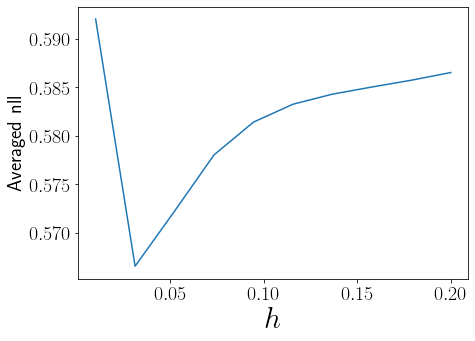

In [17]:
f = plt.figure(1, figsize = (7,5))
size_ylabel = 20
size_xlabel = 30
size_tick = 20

nll_cv = nll_cv
plt.plot(h_list[::-1], nll_cv)
plt.xlabel(r'$h$',fontsize = size_xlabel); plt.ylabel(r"Averaged nll",fontsize = size_ylabel)
plt.tick_params(axis='both', which='major', labelsize=size_tick)

f.savefig("cv_curve.pdf", bbox_inches='tight')